# **Module 2: Vector Data in Python**

#### Data
In this example, we will use the following datasets (exported from `spData` R package):  
- `world.shp` - national boundaries at a global level;
- `coffee_data.csv` - coffee production statistics by country, 2016 and 2017.
- `points.shp` - random points;
- `nz.shp` - the regions of New Zealand;
- `nz_height.shp` - high elevation points in New Zealand;
- `seine.shp` - river network in France.

Additionally, one dataset was derived ‍the HydroSHEDS database https://www.hydrosheds.org/:
- `lakes.shp` - selected lakes in Eastern Africa.

#### Software
To execute this code you will need a Python environment with the packages imported below (all required packages are already available on GEMS Informatics Platform).

In [1]:
# general use packages
import pandas as pd
import random
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True

# geospatial packages
import geopandas as gpd

import os
os.environ['PROJ_LIB'] = '/opt/conda/envs/user_default/share/proj'

### **Vector Data Review**

Representation of the spatial features using points, lines, and polygons

- Point: a precise location in space (e.g., weather stations)
- Line: a sequential collection of connected points (e.g., roads)
- Polygon: a region enclosed by lines (e.g., countries)

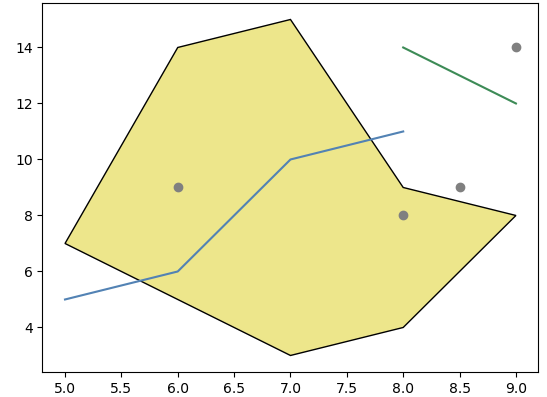

### **Attribute operations**

#### Select by attributes

In [2]:
world = gpd.read_file("./data-module-2/world.shp")
world.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
0,FJ,Fiji,Oceania,Oceania,Melanesia,Sovereign country,1.928997e+04,885806.0,69.960000,8222.253784,"MULTIPOLYGON (((-180.00000 -16.55522, -180.000..."
1,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163000,2402.099404,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,EH,Western Sahara,Africa,Africa,Northern Africa,Indeterminate,9.627060e+04,NaN,NaN,NaN,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -131.7499..."
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144..."


In [3]:
world[world["name_long"] == "Canada"]

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -131.7499..."


In [4]:
midsized_countries = world[(world["area_km2"] > 1000000)&(world["area_km2"] < 5000000)]
midsized_countries.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry
5,KZ,Kazakhstan,Asia,Asia,Central Asia,Sovereign country,2.729811e+06,17288285.0,71.620,23587.337515,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
8,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1.819251e+06,255131116.0,68.856,10003.089029,"MULTIPOLYGON (((104.36999 -1.08484, 104.53949 ..."
9,AR,Argentina,South America,Americas,South America,Sovereign country,2.784469e+06,42981515.0,76.252,18797.547947,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."
11,CD,Democratic Republic of the Congo,Africa,Africa,Middle Africa,Sovereign country,2.323492e+06,73722860.0,58.782,785.347341,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
14,SD,Sudan,Africa,Africa,Northern Africa,Sovereign country,1.850886e+06,37737913.0,64.002,4188.334814,"MULTIPOLYGON (((23.88711 8.61977, 23.80581 8.6..."


Text(0.5, 1.0, 'Mid-sized countries')

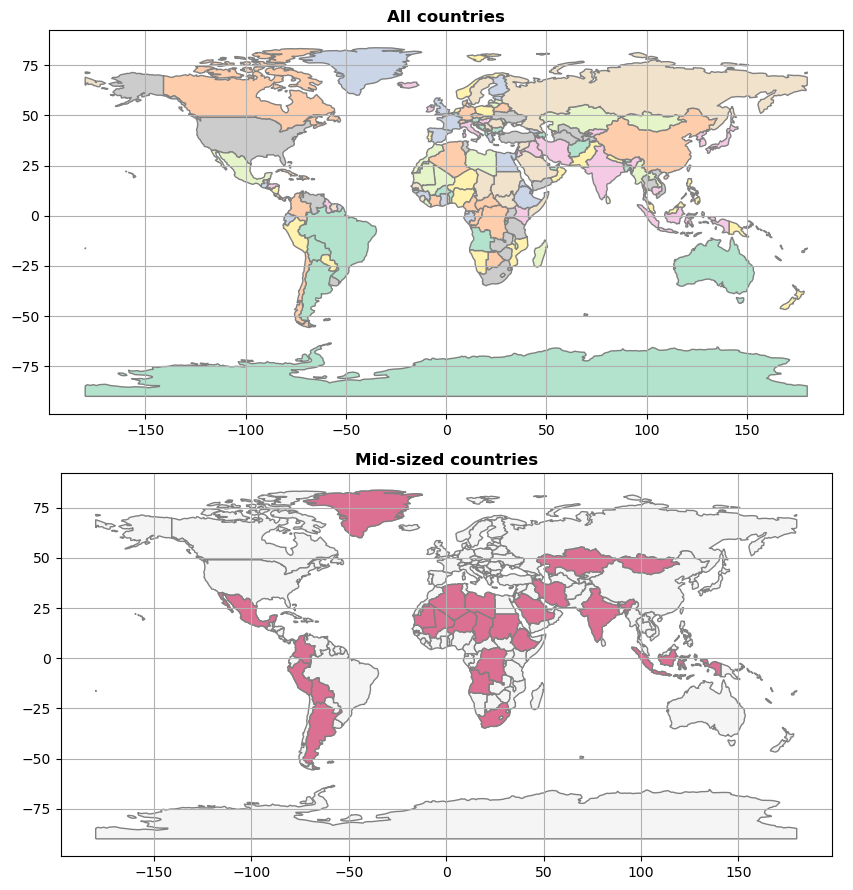

In [6]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world.plot(ax=axs[0], column="iso_a2", cmap="Pastel2", edgecolor="grey")
axs[0].set_title("All countries", weight="bold")

world.plot(ax=axs[1], color="whitesmoke", edgecolor="grey")
midsized_countries.plot(ax=axs[1], facecolor="palevioletred", edgecolor="grey")
axs[1].set_title("Mid-sized countries", weight="bold")

#### Group  by attributes

In [7]:
continents = world[["continent", "geometry", "pop"]].dissolve(by="continent", aggfunc="sum")
continents

,geometry,pop
continent,,
Africa,"MULTIPOLYGON (((11.91496 -5.03799, 11.09377 -3...",1.154947e+09
Antarctica,"MULTIPOLYGON (((-61.13898 -79.98137, -60.61012...",0.000000e+00
Asia,"MULTIPOLYGON (((120.29501 -10.25865, 118.96781...",4.311408e+09
Europe,"MULTIPOLYGON (((-53.77852 2.37670, -54.08806 2...",6.690363e+08
North America,"MULTIPOLYGON (((-78.21494 7.51225, -78.42916 8...",5.650287e+08
Oceania,"MULTIPOLYGON (((171.94871 -41.51442, 172.09723...",3.775783e+07
Seven seas (open ocean),"POLYGON ((68.93500 -48.62500, 69.58000 -48.940...",0.000000e+00
South America,"MULTIPOLYGON (((-57.75000 -51.55000, -58.05000...",4.120608e+08


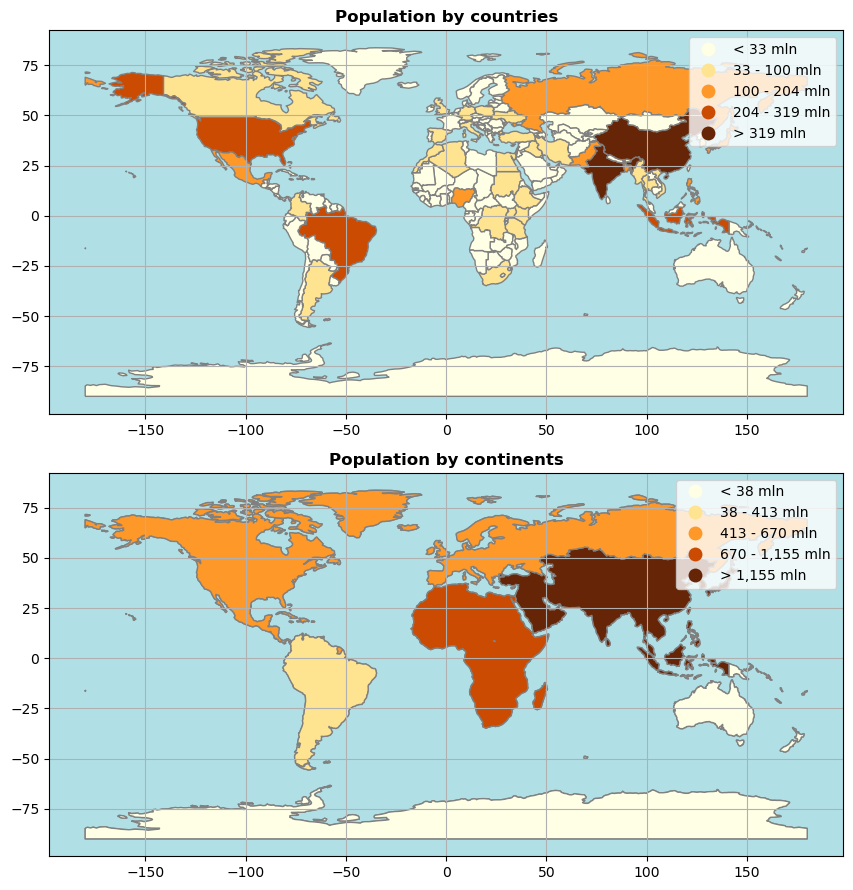

In [8]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world["pop"] = world["pop"].fillna(0)
world.plot(ax=axs[0], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[33000000,100000000,204000000,319000000]),
           legend_kwds={"labels": ["< 33 mln", "33 - 100 mln", "100 - 204 mln", 
                                   "204 - 319 mln", "> 319 mln"]})
axs[0].set_title("Population by countries", weight="bold")
axs[0].set_facecolor("powderblue")

continents.plot(ax=axs[1], column="pop", cmap="afmhot_r", edgecolor="grey")
continents.plot(ax=axs[1], column="pop", legend=True, scheme="User_Defined", cmap="YlOrBr", 
           edgecolor="grey", classification_kwds=dict(bins=[38000000,413000000,670000000,1155000000]),
           legend_kwds={"labels": ["< 38 mln", "38 - 413 mln", "413 - 670 mln", "670 - 1,155 mln",
                                   "> 1,155 mln"]})
axs[1].set_title("Population by continents", weight="bold")
axs[1].set_facecolor("powderblue")

#### Join by attributes

In [9]:
coffee_data = pd.read_csv("./data-module-2/coffee_data.csv", index_col=0)
coffee_data.head()

,name_long,coffee_production_2016,coffee_production_2017
1,Angola,NaN,NaN
2,Bolivia,3.0,4.0
3,Brazil,3277.0,2786.0
4,Burundi,37.0,38.0
5,Cameroon,8.0,6.0


In [10]:
world_coffee = pd.merge(world, coffee_data, on="name_long")
world_coffee.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,coffee_production_2016,coffee_production_2017
0,TZ,Tanzania,Africa,Africa,Eastern Africa,Sovereign country,9.327458e+05,52234869.0,64.163,2402.099404,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",81.0,66.0
1,PG,Papua New Guinea,Oceania,Oceania,Melanesia,Sovereign country,4.645201e+05,7755785.0,65.230,3709.081644,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",114.0,74.0
2,ID,Indonesia,Asia,Asia,South-Eastern Asia,Sovereign country,1.819251e+06,255131116.0,68.856,10003.089029,"MULTIPOLYGON (((104.36999 -1.08484, 104.53949 ...",742.0,360.0
3,KE,Kenya,Africa,Africa,Eastern Africa,Sovereign country,5.908369e+05,46024250.0,66.242,2753.236135,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712...",60.0,50.0
4,DO,Dominican Republic,North America,Americas,Caribbean,Sovereign country,4.815787e+04,10405844.0,73.483,12663.042247,"POLYGON ((-71.70830 18.04500, -71.68774 18.316...",1.0,NaN


Text(0.5, 1.0, '2017 coffee production')

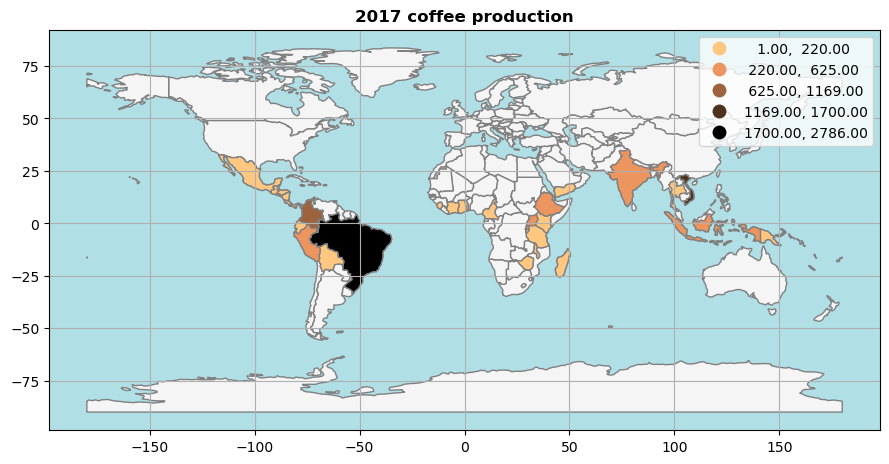

In [11]:
fig, ax = plt.subplots(figsize=(9,9), tight_layout=True)


world.plot(ax=ax, color="whitesmoke", edgecolor="grey")
world_coffee.plot(ax=ax, column="coffee_production_2017", cmap="copper_r", edgecolor="grey",
                 scheme="FisherJenks", legend=True)
ax.set_facecolor("powderblue")
ax.set_title("2017 coffee production", weight="bold")

### **Spatial operations**

#### Types of spatial relationships
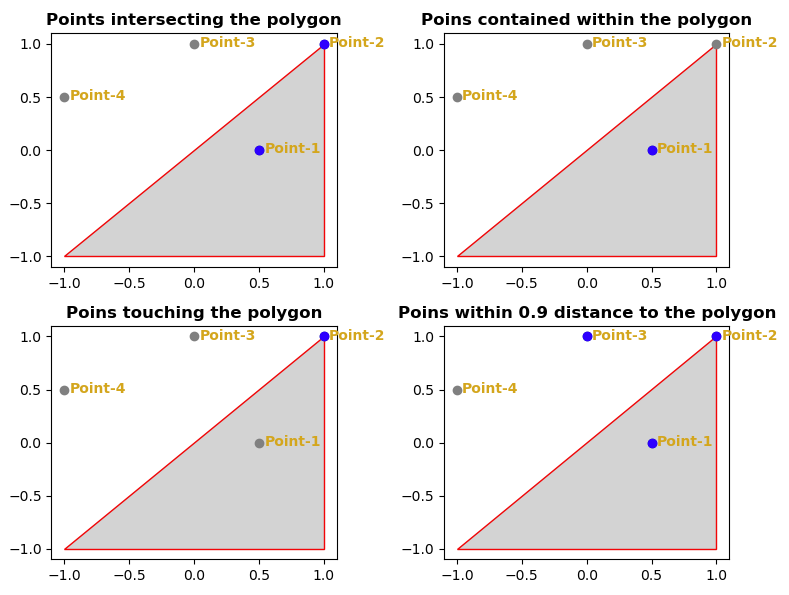

#### Spatial joins (within)

In [23]:
nz = gpd.read_file("./data-module-2/nz.shp")
nz_height = gpd.read_file("./data-module-2/nz_height.shp")
canterbury = nz[nz["Name"] == "Canterbury"]
# the predicate argument has been renamed to "op" in newest geopandas version
canterbury_height = gpd.sjoin(nz_height, canterbury, op = "within")

In [24]:
gpd.sjoin?

Additional information on spatial joins with `geopandas` can be found in the documentation: 
- https://geopandas.org/en/stable/docs/reference/api/geopandas.sjoin.html
- https://geopandas.org/en/stable/docs/user_guide/mergingdata.html

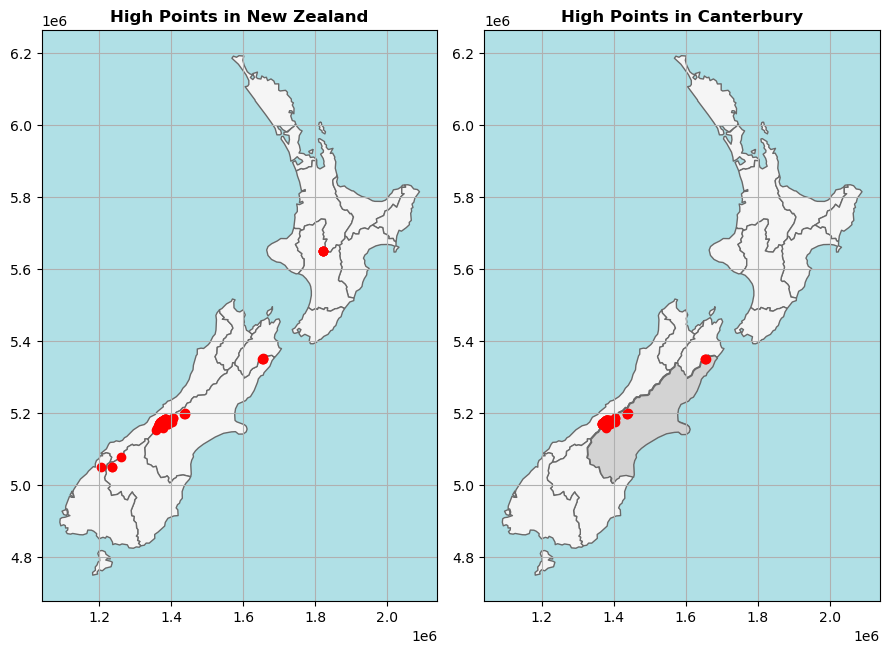

In [25]:
fig, axs = plt.subplots(1,2, figsize=(9,9), tight_layout=True)

nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0],color="red")
axs[0].set_title("High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")

nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
canterbury.plot(ax=axs[1], edgecolor="dimgrey", facecolor="lightgrey")
canterbury_height.plot(ax=axs[1], color="red")
axs[1].set_title("High Points in Canterbury", weight="bold")
axs[1].set_facecolor("powderblue")

#### Spatial joins (within OR contains)

In [26]:
points_gpd = gpd.read_file("./data-module-2/points.shp")
points_gpd

,FID,geometry
0,0,POINT (-119.80426 -87.08403)
1,1,POINT (-110.57171 58.10353)
2,2,POINT (-4.67711 21.54996)
3,3,POINT (129.95361 -23.40535)
4,4,POINT (115.30103 -70.60125)
5,5,POINT (-98.86064 26.94549)
6,6,POINT (102.81242 47.83418)
7,7,POINT (-94.50239 40.14810)
8,8,POINT (28.83515 29.59003)
9,9,POINT (113.16285 34.10495)


In [27]:
points_within_world = gpd.sjoin(points_gpd, world, op="within")
points_within_world.head()

,FID,geometry,index_right,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap
0,0,POINT (-119.80426 -87.08403),159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,0.0,NaN,NaN
4,4,POINT (115.30103 -70.60125),159,AQ,Antarctica,Antarctica,Antarctica,Antarctica,Indeterminate,1.233596e+07,0.0,NaN,NaN
1,1,POINT (-110.57171 58.10353),3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525
2,2,POINT (-4.67711 21.54996),52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622
3,3,POINT (129.95361 -23.40535),137,AU,Australia,Oceania,Oceania,Australia and New Zealand,Country,7.687614e+06,23504138.0,82.300000,43547.197484


In [28]:
world_with_points = gpd.sjoin(world, points_gpd, op ="contains")
world_with_points.head()

,iso_a2,name_long,continent,region_un,subregion,type,area_km2,pop,lifeExp,gdpPercap,geometry,index_right,FID
3,CA,Canada,North America,Americas,Northern America,Sovereign country,1.003604e+07,35535348.0,81.953049,43079.142525,"MULTIPOLYGON (((-132.71001 54.04001, -131.7499...",1,1
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144...",5,5
4,US,United States,North America,Americas,Northern America,Country,9.510744e+06,318622525.0,78.841463,51921.984639,"MULTIPOLYGON (((-171.73166 63.78252, -171.1144...",7,7
52,ML,Mali,Africa,Africa,Western Africa,Sovereign country,1.235561e+06,16962846.0,57.007000,1865.160622,"POLYGON ((-11.51394 12.44299, -11.46790 12.754...",2,2
97,MN,Mongolia,Asia,Asia,Eastern Asia,Sovereign country,1.544322e+06,2923896.0,68.847000,11348.647341,"POLYGON ((87.75126 49.29720, 88.80557 49.47052...",6,6


Text(0.5, 1.0, 'Countries containing random points')

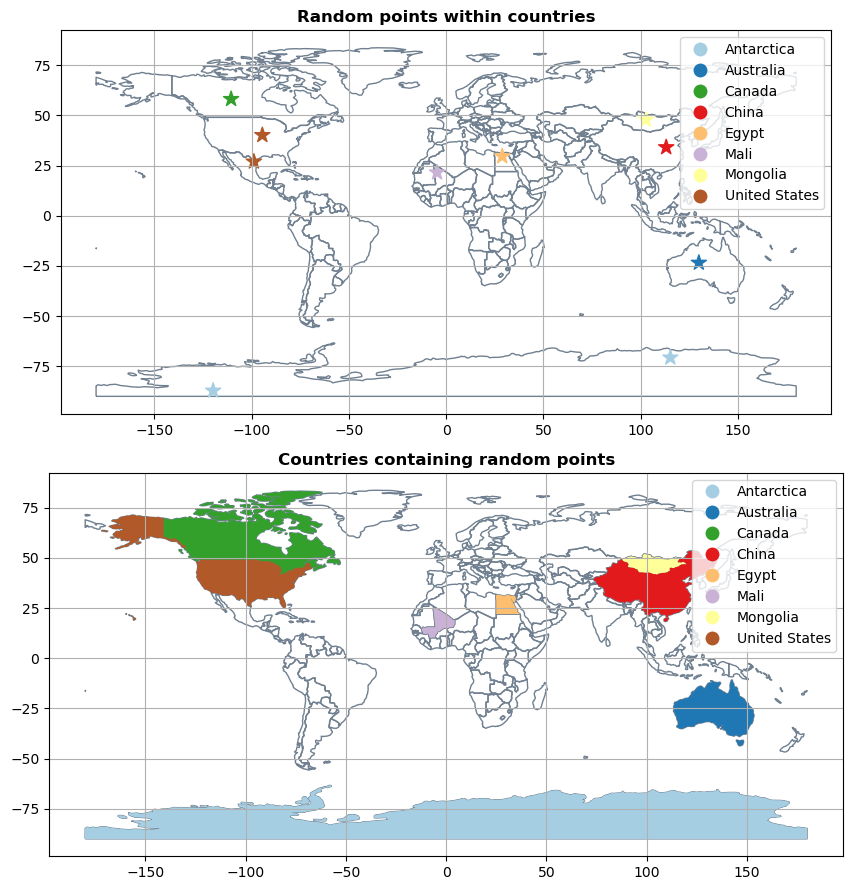

In [29]:
fig, axs = plt.subplots(2,1, figsize=(9,9), tight_layout=True)

world.plot(ax=axs[0], edgecolor="slategrey", facecolor="none")
points_within_world.plot(ax=axs[0], marker="*", markersize=130, column="name_long", legend=True, cmap="Paired")
axs[0].set_title("Random points within countries", weight="bold")

world.plot(ax=axs[1], edgecolor="slategrey", facecolor="none")
world_with_points.plot(ax=axs[1], column="name_long", legend=True, cmap="Paired")
axs[1].set_title("Countries containing random points", weight="bold")

#### Combining operations (spatial join + dissolve)

In [30]:
nz_merged = gpd.sjoin(nz, nz_height, op="contains")
nz_merged = nz_merged[["Name", "geometry", "elevation"]].dissolve(by="Name", aggfunc="mean")
nz_merged.head()

,geometry,elevation
Name,,
Canterbury,"POLYGON ((1641829.894 5293955.832, 1639332.138...",2994.6
Manawatu-Wanganui,"POLYGON ((1868949.091 5654440.431, 1865828.826...",2777.0
Marlborough,"MULTIPOLYGON (((1679241.140 5359477.533, 16677...",2720.0
Otago,"POLYGON ((1336955.651 5118634.251, 1325903.335...",2825.0
Southland,"MULTIPOLYGON (((1218477.778 4806498.449, 12297...",2723.0


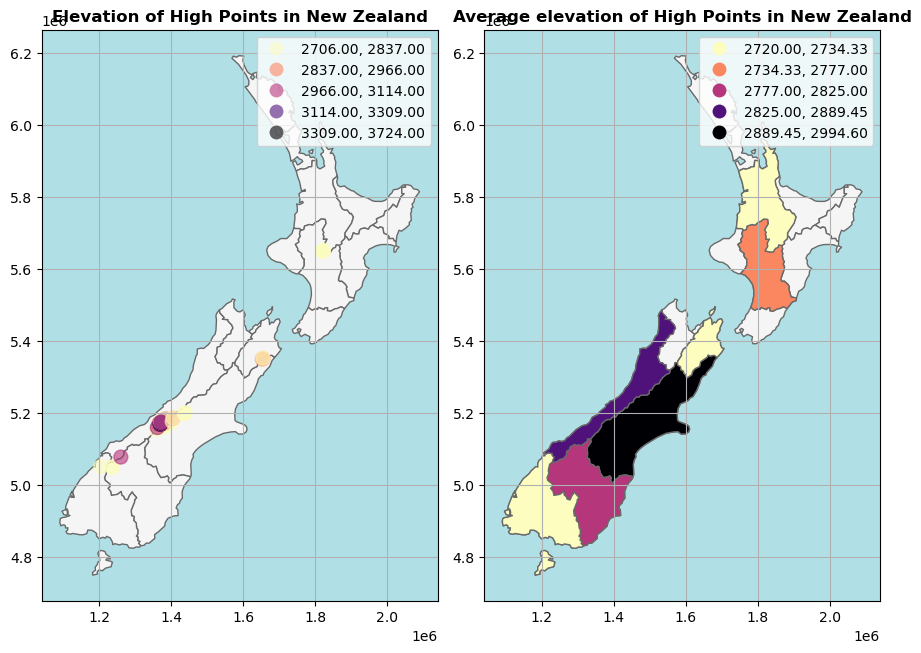

In [31]:
fig, axs = plt.subplots(1,2, figsize=(9,9), tight_layout=True)

nz.plot(ax=axs[0], edgecolor="dimgrey", facecolor="whitesmoke")
nz_height.plot(ax=axs[0], marker = "o", markersize=100, alpha=0.6, column="elevation", legend=True, scheme="FisherJenks", cmap="magma_r")
axs[0].set_title("Elevation of High Points in New Zealand", weight="bold")
axs[0].set_facecolor("powderblue")

nz.plot(ax=axs[1], edgecolor="dimgrey", facecolor="whitesmoke")
nz_merged.plot(ax=axs[1], column="elevation", edgecolor="dimgrey", legend=True,  scheme="FisherJenks", cmap="magma_r")
axs[1].set_title("Average elevation of High Points in New Zealand", weight="bold")
axs[1].set_facecolor("powderblue")

### **Geometry operations**

#### Centroids

**Check if your data is in Projected CRS. To use `centroid` function correctly, the data needs to be projected!
If needed, CRS can be changed with the following command:**
- `nz.to_crs("EPSG:2193")`

In [32]:
nz.crs

<Projected CRS: PROJCS["NZGD_2000_New_Zealand_Transverse_Mercator" ...>
Name: NZGD2000 / New Zealand Transverse Mercator 2000
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: New Zealand Geodetic Datum 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [33]:
# Note we are making a copy of the NZ data before creating the centroid
nz_centroid = nz.copy()
nz_centroid["geometry"] = nz.centroid
nz_centroid.head()

,Name,Island,Land_ar,Popultn,Mdn_ncm,Sex_rat,geometry
0,Northland,North,12500.561149,175500.0,23400,0.942453,POINT (1674704.958 6070011.136)
1,Auckland,North,4941.572557,1657200.0,29600,0.944286,POINT (1753550.944 5934750.688)
2,Waikato,North,23900.036383,460100.0,27900,0.952050,POINT (1819510.803 5787726.356)
3,Bay of Plenty,North,12071.144689,299900.0,26200,0.928039,POINT (1935307.866 5769702.580)
4,Gisborne,North,8385.826619,48500.0,24400,0.934973,POINT (2030849.434 5751714.451)


In [ ]:
seine = gpd.read_file("./data-module-2/seine.shp")
seine_centroid = seine.copy()
seine_centroid["geometry"] = seine.centroid
seine_centroid

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), tight_layout=True)

nz.plot(ax=axs[0], column="Name", cmap="Pastel1")
nz_centroid.plot(ax=axs[0], edgecolor="dimgrey", column="Name", cmap="Pastel1")
axs[0].set_title("New Zealand Regions with Centroids", weight="bold")
axs[0].set_facecolor("powderblue")

seine.plot(ax=axs[1], column="name", cmap="Accent")
seine_centroid.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent", markersize=120)
axs[1].set_title("Seine Tributaries with Centroids", weight="bold")
axs[1].set_facecolor("ivory")

#### Buffer

In [ ]:
# Again, before we are doing a geometric calcuation (centroid, buffer), we make a copy of the dataset first so we don't
# overwrite the underlying geometry of the original spatial dataset
nz_buffer = nz.copy()
nz_buffer["geometry"] = nz.buffer(50000)
seine_buffer = seine.copy()
seine_buffer["geometry"] = seine.buffer(5000)

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,5), tight_layout=True)

nz_buffer.plot(ax=axs[0], edgecolor="white", column="Name", cmap="Pastel1", alpha=0.7)
nz.plot(ax=axs[0], facecolor="none", edgecolor="dimgrey")
axs[0].set_title("New Zealand Regions with 50km buffer", weight="bold")
axs[0].set_facecolor("powderblue")

seine_buffer.plot(ax=axs[1], edgecolor="dimgrey", column="name", cmap="Accent")
seine.plot(ax=axs[1], color="white")
axs[1].set_title("Seine Tributaries with 5km Buffer", weight="bold")
axs[1].set_facecolor("ivory")

#### Clip geometry

In [37]:
uganda =  world[(world["name_long"] == "Uganda")]
lakes_gdf = gpd.read_file("./data-module-2/lakes.shp")

**Check if your input datasets are in the same CRS. To clip the geometries, CRS needs to be consistent across the datasets!**

In [40]:
lakes_gdf.crs == uganda.crs

True

In [41]:
lake_segments = gpd.overlay(lakes_gdf, uganda)

In [42]:
lakes_inter = gpd.sjoin(lakes_gdf, uganda, predicate="intersects")
lakes_within = gpd.sjoin(lakes_gdf, uganda, predicate="within")

TypeError: sjoin() got an unexpected keyword argument 'predicate'

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(10,10))

lakes_gdf.plot(ax=axs[0,0], facecolor="skyblue", edgecolor="none")
uganda.plot(ax=axs[0,0], facecolor="none", edgecolor="black")
axs[0,0].set_title("Lakes", weight="bold")

lakes_gdf.plot(ax=axs[0,1], facecolor="skyblue", edgecolor="none")
lakes_inter.plot(ax=axs[0,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[0,1], facecolor="none", edgecolor="black")
axs[0,1].set_title("Lakes intersect", weight="bold")

lakes_gdf.plot(ax=axs[1,0], facecolor="skyblue", edgecolor="none")
lakes_within.plot(ax=axs[1,0], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,0], facecolor="none", edgecolor="black")
axs[1,0].set_title("Lakes within", weight="bold")

lakes_gdf.plot(ax=axs[1,1], facecolor="skyblue", edgecolor="none")
lake_segments.plot(ax=axs[1,1], facecolor="red", edgecolor="none")
uganda.plot(ax=axs[1,1], facecolor="none", edgecolor="black")
axs[1,1].set_title("Lakes overlayed", weight="bold")

### **Exercices**

#### Data
- `gw_provinces_extra.shp` - Minnesota Groundwater Provinces shapefile;
- `mn_rivers.shp` - Minnesota river shapefile;
- `soil_samp.shp` - Soil temperature stations shapefile.

**Question 1. Find and plot all groundwater provinces in Minnesota that have `var1` equal to `"a"` and `var3` greater than 100.**

**Question 2. Create a simple `DataFrame` with the following code:**
```r
random.seed(0) 
data = {"ProvID": list(range(1,7)),
        "var4":["yes", "no", "no", "yes", "no", "yes"],
        "var5": random.sample(range(10, 50), 6)}
gw_prov_df = pd.DataFrame(data)
```
**Merge `gw_provinces_extra_gdf` with `gw_prov_df` into a new object called `gw_prov_stats`. Which columns were used as keys for join? Pay attention to the data type of these columns.**

**Question 3. Dissolve groundwater provinces data by `var1`. Use `sum` as aggregation function.**

**Question 4. Find and plot the rivers found (even partially) in groundwater PROVINCE 5.**

**Question 5. Which groundwater province is the Lamberton soil sample site located in?**

**Question 6. Find the soil sample sites that are within 10 km of the Mississippi river.**

**Question 7. Find 10-km buffer for Mississippi river, the centroid for Mississippi river, and Mississippi river segments clipped by PROVINCE 4 (use `overlay` operation). Display results on a figure with 3 subplots.**